#**K-Means clustering 알고리즘**

비지도학습으로 데이터에 레이블이 없는 데이터셋을 다룸. 군집화의 목표는 서로 유사한 데이터들은 같은 그룹으로, 서로 유사하지 않은 데이터는 다른 그룹으로 분리하는 것.

**적용 분야**
* 고객 세분화
* 추천 시스템
* 검색 엔진

**K-Means 알고리즘 원리**
* **Step1.** 초기점(k) 설정: 임의의 초기 중심점(centroid)을 k수 만큼 생성 
* **Step2.** 그룹(cluster) 부여: k개의 중심점과 개별 데이터(Xi)간의 거리를 측정여 그룹 부여
* **Step3.** 중심점 업데이트: 그룹 안의 데이터들이 새로운 중심점을 찾음
* **Step4.** 그룹 안의 데이터들이 변경되고 다시 새로운 줌심점을 찾음 **[변화가 없을때까지 반복]**

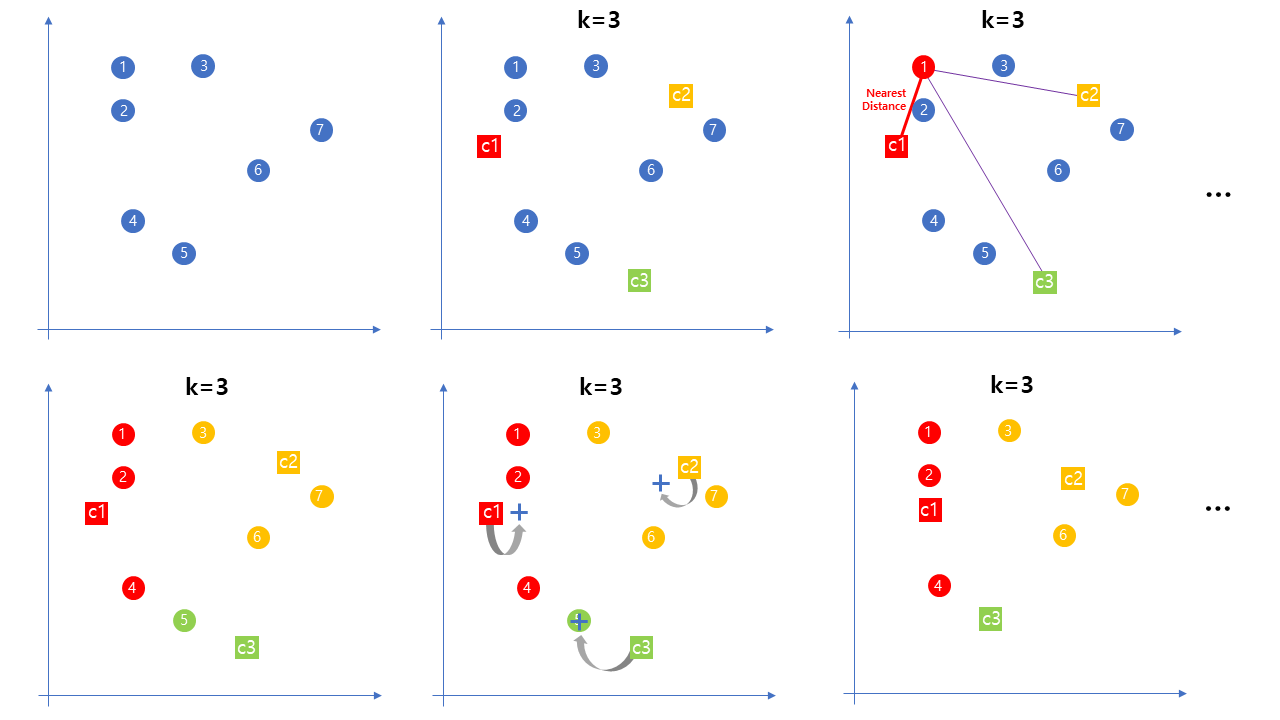

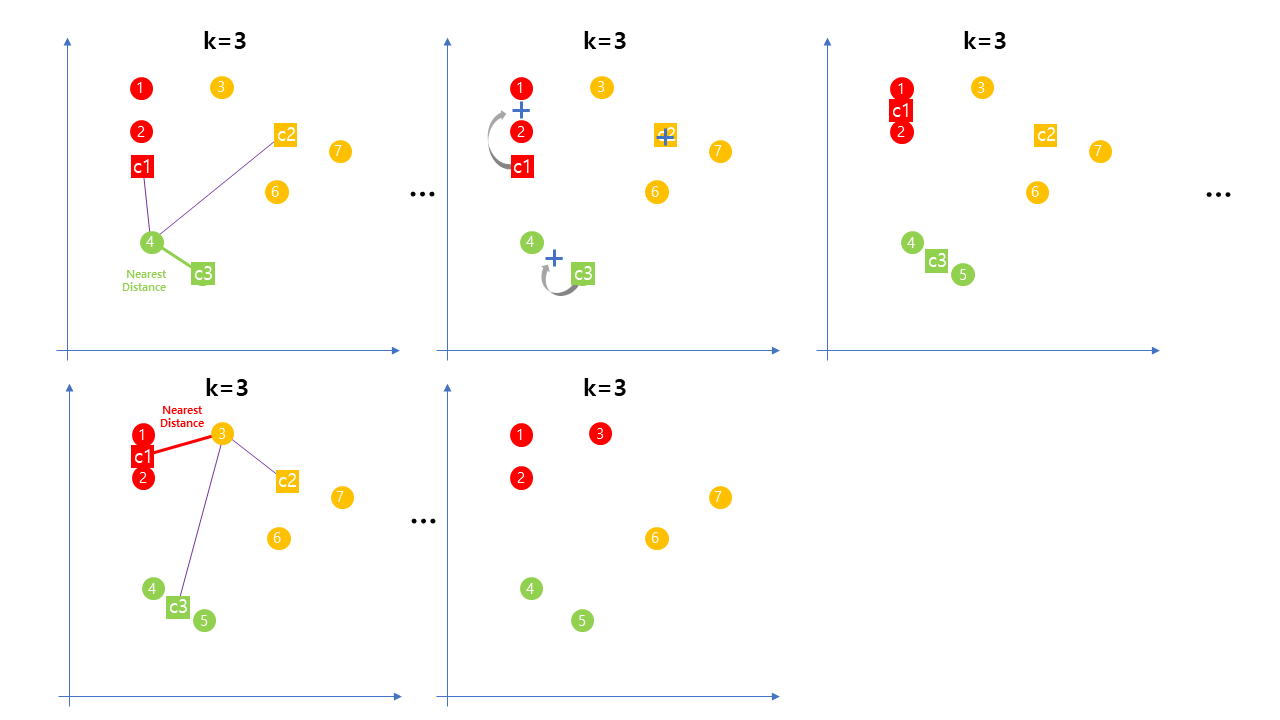

**Optimization Function**

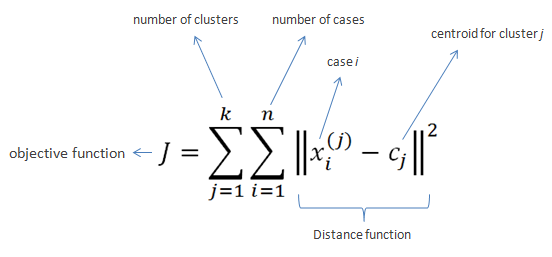

**이슈**: 전통적인 K-Means의 문제, 초기점(초기 중심점) 무작위 선정의 문제 K-Means++

# **군집분석 : 타깃마케팅을 위한 K-means 군집화**

**RFM**은 가치있는 고객을 추출해내어 이를 기준으로 고객을 분류할 수 있는 매우 간단하면서도 유용하게 사용될 수 있는 방법으로 알려져 있어 마케팅에서 가장 많이 사용되고 있는 분석방법 중 하나이다. RFM은 구매 가능성이 높은 고객을 선정하기 위한 데이터 분석방법으로서, 분석과정을 통해 데이터는 의미있는 정보로 전환된다.

**RFM**은 **Recency, Frequency, Monetar**y의 약자로 고객의 가치를 다음의 세 가지 기준에 의해 계산하고 있다.

Recency - 거래의 최근성: 고객이 얼마나 최근에 구입했는가?</br>
Frequency - 거래빈도: 고객이 얼마나 빈번하게 우리 상품을 구입했나?</br>
Monetary - 거래규모: 고객이 구입했던 총 금액은 어느 정도인가?</br>

##**데이터 전처리**

### **1) 데이터 수집**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings

warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
retail_df = pd.read_excel('/content/drive/MyDrive/python_code/ML/dataset/Online_Retail.xlsx')
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


InvoiceNo: 송장번호, 'C'로 시작하는 것은 취소 주문</br>
StockCode:	제품 고유의 제품 품목</br>
Description: 제품 설명</br>
Quantity: 주문 수량</br>
InvoiceDate: 주문날짜와 시간</br>
UnitPrice: 제품 단가(파운드)</br>
CustomerID:고객번호</br>
Country:주문 고객의 국적</br>



In [ ]:
temp_df = retail_df.copy()

### **2) 데이터 준비 및 탐색(EDR)**

**일일 판매량 분석**
* 날짜만 출력: temp_df['InvoiceDate'].dt.date



* 일일 판매량 그래프

### **3) Customer 기반 RFM Dataset 생성**

**Monetary data** (total of all the transactions of a customer)</br>
거래규모: 고객이 구입했던 총 금액은 어느 정도인가?</br>

**Frequency Data**</br>
거래빈도: 고객이 얼마나 빈번하게 우리 상품을 구입했나?</br>

**Recency**</br>
거래의 최근성: 고객이 얼마나 최근에 구입했는가?</br>

###**표준화**

## **Clustering: K-Means**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans =  KMeans(n_clusters = 5, random_state = 1000)
rfm_df['segment'] = kmeans.fit(scaled_df)

In [ ]:
rfm_df['segment'] = kmeans.predict(scaled_df)
rfm_df

,Amount,Frequency,Recency,seg_km
CustomerID,,,,
12346.0,2.08,2,325,3
12347.0,2939.21,182,2,1
12348.0,2519.71,31,75,1
12349.0,1236.10,73,18,1
12350.0,262.30,17,310,3
...,...,...,...,...
18280.0,92.65,10,277,3
18281.0,93.36,7,180,3
18282.0,160.68,13,7,1


In [ ]:
rfm_df['segment'].value_counts()

1    2935
3    1065
0     356
2      12
4       4
Name: seg_km, dtype: int64

In [ ]:
rfm_df.groupby('segment')[['Monetary',	'Frequency',	'Recency']].mean()

,Amount,Frequency,Recency
seg_km,,,
0,5931.526798,406.367978,15.168539
1,922.998413,66.680409,43.916525
2,71868.650000,1105.916667,7.833333
3,359.797663,27.725822,249.763380
4,62118.942500,5914.000000,1.500000


Text(0, 0.5, 'Recency')

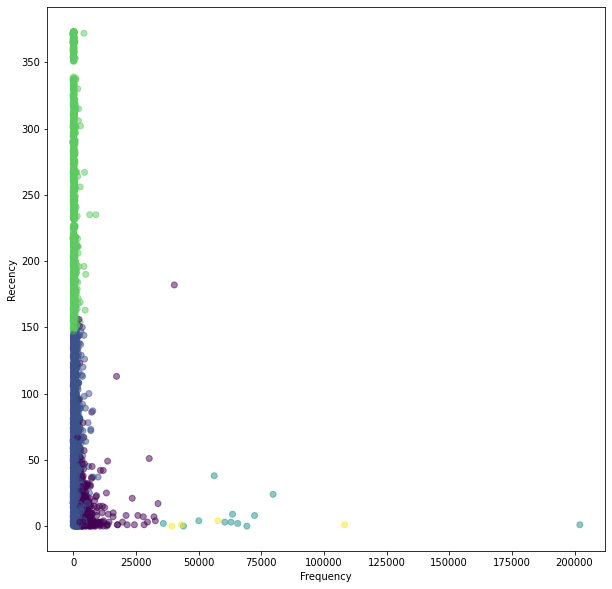

In [ ]:
x = rfm_df['Monetary']
y = rfm_df['Recency']
plt.figure(figsize=(10, 10))
plt.scatter(x, y, c = rfm_df['segment'], alpha = 0.5)
plt.xlabel('Frequency')
plt.ylabel('Recency')

## **Clustering 최적화**

In [ ]:
  distortions = []
  for k in range(1, 11):
      kmeans = KMeans(n_clusters = k, random_state = 1234)
      kmeans.fit(scaled_df)
      distortions.append(kmeans.inertia_)

In [ ]:
plt.plot(range(1, 11), distortions, 'ro-')
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("distortions")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
segment = kmeans.fit_predict(scaled_df)

In [ ]:
df['Clustering'] = segment
df

In [ ]:
df['Clustering'].value_counts()

0    1318
1    1212
2     966
3     876
Name: Clustering, dtype: int64

In [ ]:
df.groupby('Clustering')[['Monetary',	'Frequency',	'Recency']].median()

## **평가 및 시각화**

**실루엣 계수(Silhouette Coefficient):**</br>

 

각 데이터 포인트와 주위 데이터 포인트들과의 거리 계산을 통해 값을 구하며,

군집 안에 있는 데이터들은 잘 모여있는지, 군집끼리는 서로 잘 구분되는지 클러스터링을 평가하는 척도로 활용된다.

* 실루엣 계수의 평균값이 1에 가까울수록 군집화가 잘 되었다고 생각할 수 있다.</br>  

* 각 클러스터 내의 데이터 포인트들의 실루엣 계수 평균값을 구하여, 각 클러스터별 평균값도 구할 수 있다. 1에 가까운 평균값을 가지는 클러스터는 'clear-cut' 클러스터, 0에 가까운 값을 가지는 클러스터는 'weak' 클러스터로 표현된다.

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, random_state = 1234)
    kmeans.fit(scaled_df)
    score = silhouette_score(scaled_df, kmeans.labels_)
    silhouette_coefficients.append(score)

In [ ]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

**Boxplot 시각화**

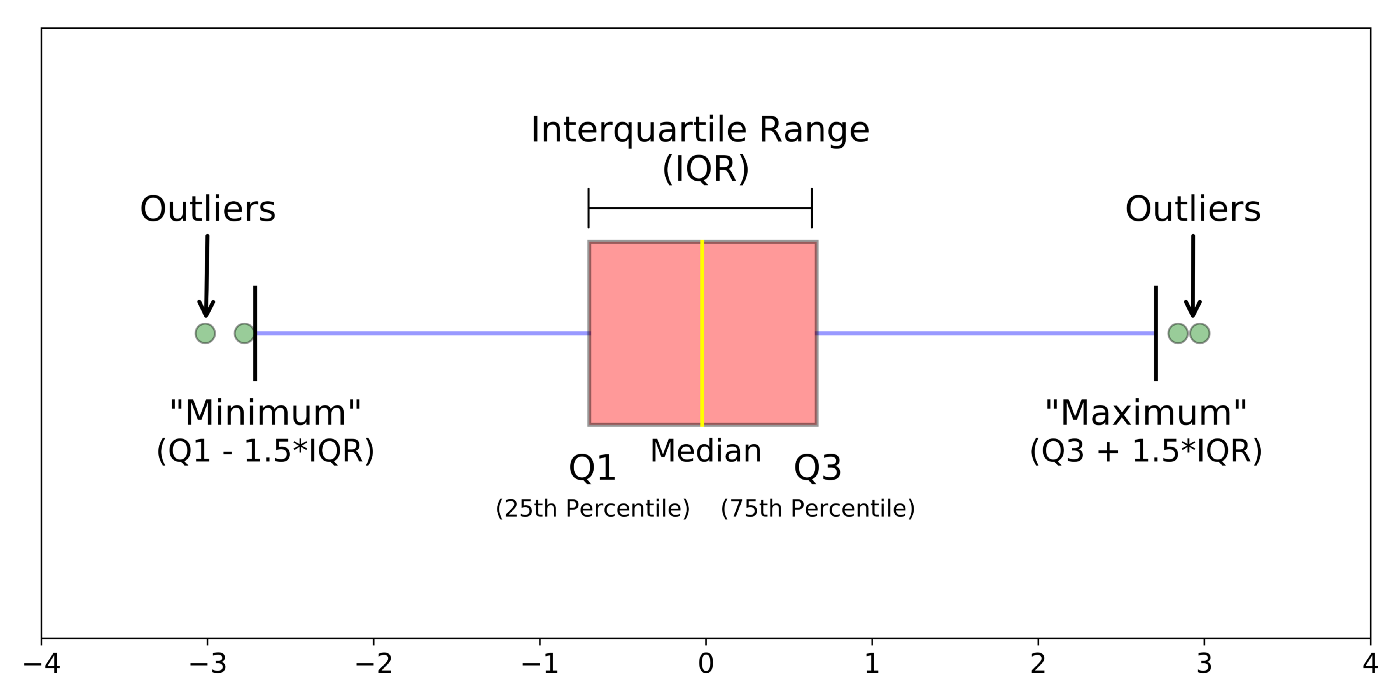

In [ ]:
sns.boxplot(x=df['Clustering'], y=df['Monetary'], data=df)

In [ ]:
sns.boxplot(x=df['Clustering'], y=df['Recency'], data=df)

In [ ]:
sns.boxplot(x=df['Clustering'], y=df['Frequency'], data=df)